# **Bagging**

##  Bagging with Decision Tree

In [18]:
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [19]:
# Step 1: Load the dataset (Iris dataset)
iris = load_iris()
X = iris.data  # Features (petal length, petal width, etc.)
y = iris.target  # Target labels (setosa, versicolor, virginica)

In [20]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Step 3: Initialize a Decision Tree Classifier
dtree = DecisionTreeClassifier()

In [22]:
# Step 4: Create a BaggingClassifier using the Decision Tree as the base estimator
bagging_clf = BaggingClassifier(estimator=dtree, n_estimators=50, random_state=42)

In [23]:
# Step 5: Train the BaggingClassifier on the training data
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [24]:
# Step 6: Make predictions on the test data
y_pred = bagging_clf.predict(X_test)

In [25]:
# Step 7: Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging with Decision Tree: {accuracy:.2f}")

Accuracy of Bagging with Decision Tree: 1.00


In [26]:
# Step 8: Feature Importance from one Decision Tree in the Bagging Classifier (You can't use bagging_clf directly)
dtree_fitted = bagging_clf.estimators_[0]  # Access the first fitted DecisionTree from the bagging ensemble
feature_importances = dtree_fitted.feature_importances_

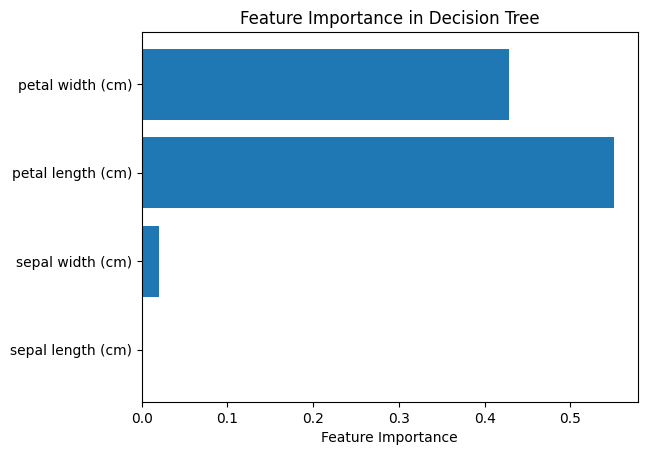

In [27]:
# Step 9: Visualize feature importance (for Decision Tree)
features = iris.feature_names
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.show()

## Bagging with K-Nearest Neighbors (KNN)

In [5]:
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
# Step 1: Create a synthetic dataset using make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_classes=2, random_state=42)

In [7]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Step 3: Initialize a K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [9]:
# Step 4: Create a BaggingClassifier using the KNN as the base estimator
bagging_clf_knn = BaggingClassifier(estimator=knn, n_estimators=50, random_state=42)

In [10]:
# Step 5: Train the BaggingClassifier on the training data
bagging_clf_knn.fit(X_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=50,
                  random_state=42)

In [11]:
# Step 6: Make predictions on the test data
y_pred_knn = bagging_clf_knn.predict(X_test)

In [12]:
# Step 7: Evaluate the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of Bagging with KNN: {accuracy_knn:.2f}")

Accuracy of Bagging with KNN: 0.90


In [13]:
# Step 8: Visualize the accuracy of different numbers of estimators
import matplotlib.pyplot as plt
n_estimators_range = range(10, 100, 10)
accuracy_values = []

In [14]:
# Try different numbers of estimators to visualize performance
for n in n_estimators_range:
    bagging_clf_knn = BaggingClassifier(estimator=knn, n_estimators=n, random_state=42)
    bagging_clf_knn.fit(X_train, y_train)
    y_pred_knn = bagging_clf_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracy_values.append(accuracy)

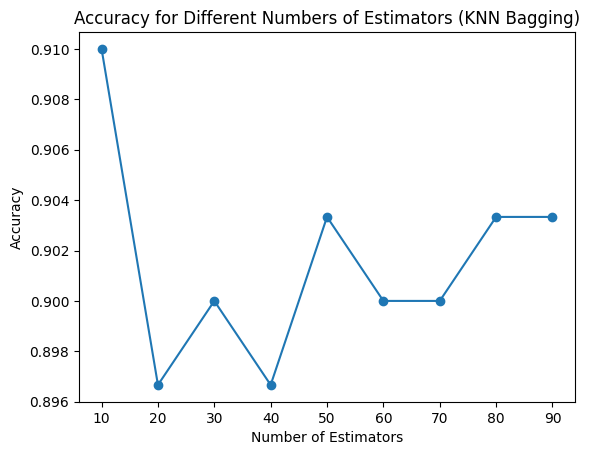

In [15]:
# Plotting the accuracy vs number of estimators
plt.plot(n_estimators_range, accuracy_values, marker='o')
plt.title("Accuracy for Different Numbers of Estimators (KNN Bagging)")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.show()

# **Boosting**

In [28]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Breast Cancer dataset from sklearn)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Create DataFrame for easier data handling
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display first few rows of the dataset
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Data Preprocessing

In [29]:
# Splitting the dataset into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check dimensions of the data
print(f'Training set shape: {X_train_scaled.shape}')
print(f'Test set shape: {X_test_scaled.shape}')

Training set shape: (398, 30)
Test set shape: (171, 30)


**AdaBoost Classifier**

AdaBoost Model Performance:
Accuracy: 0.9590643274853801
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        64
           1       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



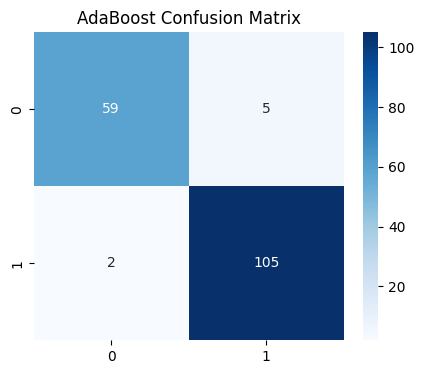

In [30]:
# Initialize the AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Train the AdaBoost model
ada_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ada = ada_clf.predict(X_test_scaled)

# Evaluate AdaBoost model performance
print("AdaBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost Confusion Matrix')
plt.show()

**Gradient Boosting Classifier**

Gradient Boosting Model Performance:
Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



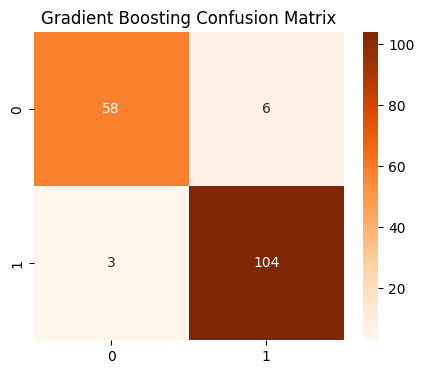

In [31]:
# Initialize the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the Gradient Boosting model
gb_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_gb = gb_clf.predict(X_test_scaled)

# Evaluate Gradient Boosting model performance
print("Gradient Boosting Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Oranges')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

**XGBoost Classifier**

XGBoost Model Performance:
Accuracy: 0.9590643274853801
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        64
           1       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



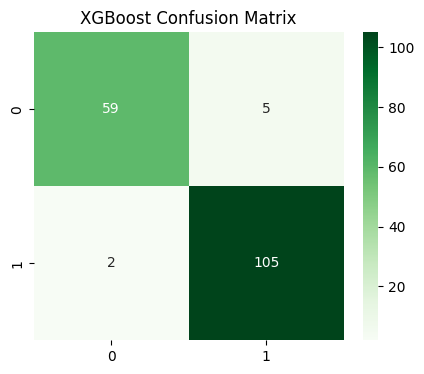

In [32]:
# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the XGBoost model
xgb_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Evaluate XGBoost model performance
print("XGBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title('XGBoost Confusion Matrix')
plt.show()

**Compare the Models**

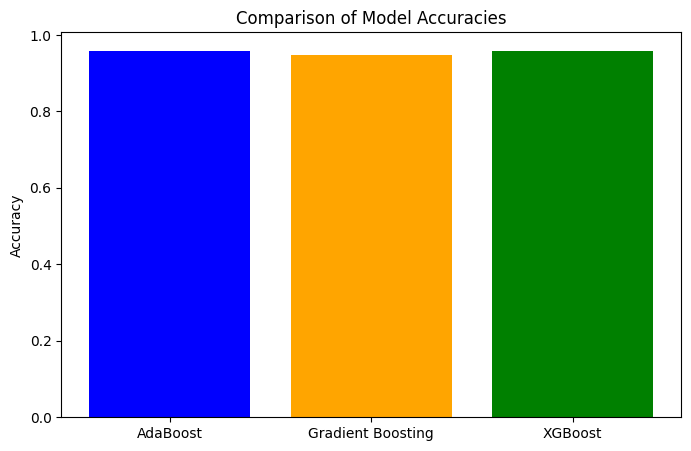

In [33]:
# Compare the accuracy of all models
models = ['AdaBoost', 'Gradient Boosting', 'XGBoost']
accuracies = [accuracy_score(y_test, y_pred_ada),
              accuracy_score(y_test, y_pred_gb),
              accuracy_score(y_test, y_pred_xgb)]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()